### Atividade
Para resolver as questões abaixo utilizar o dataset [Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# importando algumas bases de dados

titanic = sns.load_dataset('titanic')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:

titanic.isna().sum()[titanic.isna().sum() > 0] # avaliar dados faltantes e isolando apenas aqueles que possuem

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Questão 1
Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

In [6]:
town = titanic['embark_town'].value_counts()
town

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<AxesSubplot:>

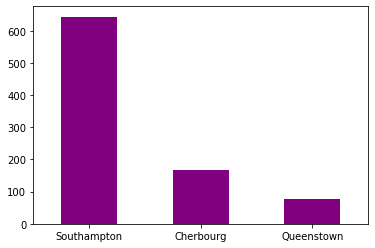

In [23]:
town.plot(kind='bar', rot=0, color='purple')

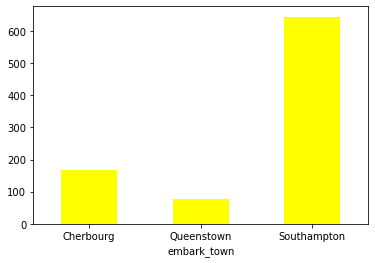

In [38]:
# Há como fazer pelo groupby mas é mais "trabalhoso", retornando a mesma coisa
titanic.groupby('embark_town')['embark_town'].count().plot.bar(rot=0,color='yellow');
     

In [14]:
x= titanic.groupby('embark_town')['fare'].mean()     

<AxesSubplot:ylabel='fare'>

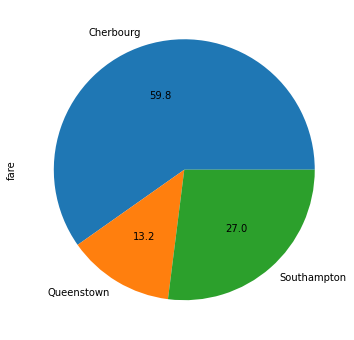

In [15]:
x.plot(kind='pie',figsize = (16,6), autopct = '%.1f')

#### Questão 2
Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

In [19]:
sex = pd.get_dummies(titanic, columns=['sex'])
sex.head()
     

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1


<AxesSubplot:ylabel='embark_town'>

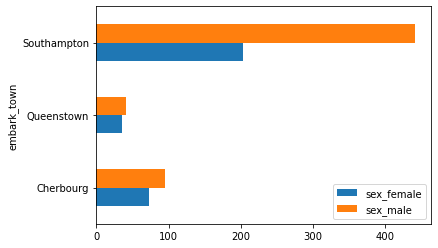

In [21]:
sex.groupby('embark_town')[['sex_female','sex_male']].sum().plot.barh(rot=0)

### Questão 3
Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

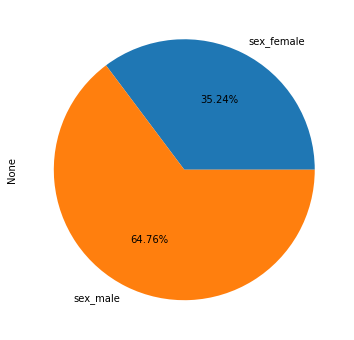

In [22]:
pd.get_dummies(titanic, columns=['sex'])[['sex_female','sex_male']].sum().plot.pie(
    figsize=(16, 6), autopct ='%.2f%%');

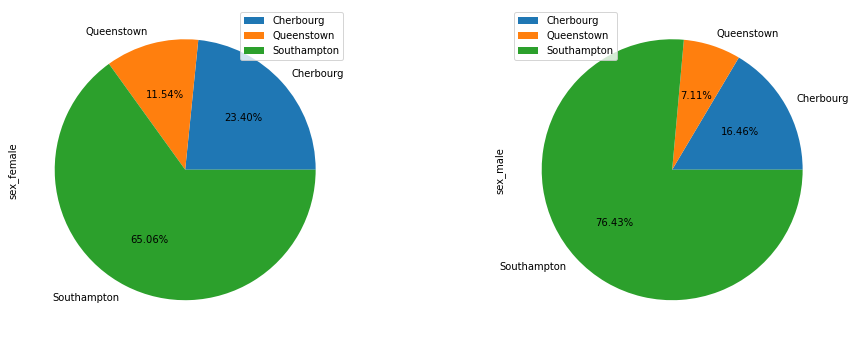

In [23]:
#  DOIS GRAFICOS SEPARADOS POR GÊNERO
pd.get_dummies(titanic, columns=['sex']).groupby('embark_town')[['sex_female','sex_male']].sum().plot.pie(subplots = True,
    figsize=(16, 6), autopct ='%.2f%%');

### Questão 4
Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

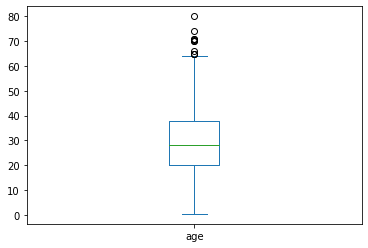

In [24]:
 
titanic['age'].plot.box();

### Questão 5
Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

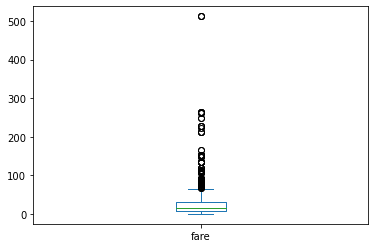

In [27]:
titanic['fare'].plot.box();

### Questão 6
Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

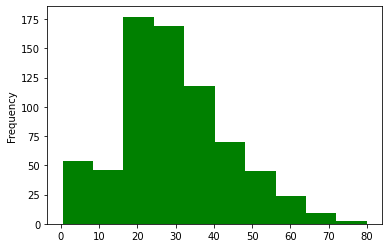

In [29]:
titanic['age'].plot.hist(color ='green');

### Questão 7
Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

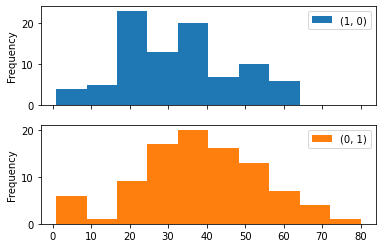

In [35]:
sex.dropna().reset_index().pivot('index', ['sex_female', 'sex_male'], 'age').plot.hist(subplots = True);

<AxesSubplot:ylabel='Frequency'>

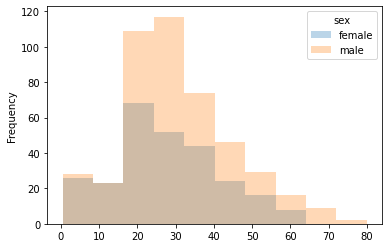

In [36]:
titanic[['sex','age']].reset_index().pivot('index', 'sex', 'age').plot.hist(alpha=0.3)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

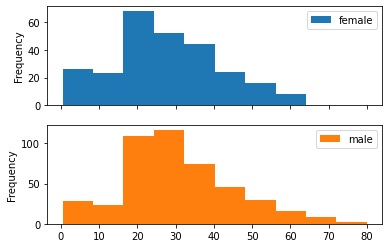

In [37]:
titanic[['sex','age']].reset_index().pivot('index', 'sex', 'age').plot.hist(subplots = True)